# INTRODUCTION
CNN algorithms are often used for images.We will use fruits dataset for this notebook and will create a model for the fruits.

<font color ='blue'>
Content:
    
1. [Import Libraries](#1)<br>
1. [Load and Check Data](#2)<br>
    * [Find Number of Classes and Image Size](#3)<br>
1. [Create CNN Model](#4)<br>
    * [What is the cnn model ?](#5)<br>
    * [Why do we use the cnn model ?](#6)<br>
    * [How CNNs Work ?](#7)<br>
        * [Convolution Layer](#8)<br>
        * [Pooling Layer](#9)<br>
        * [Fully Connected Layer](#10)<br>
        * [Relu Function](#11)<br>
        * [Softmax Function](#12)<br>
        * [Categorical Crossentropy](#13)<br>
1. [Image Data Generator](#14)<br>
1. [Flow From Directory](#15)<br>
1. [Fit the Model](#16)<br>
1. [Save Results](#17)<br>
1. [Visualization of results](#18)<br>
1. [Outcomes](#19)<br>
    

    
    
    
    
     
    
    

   




<a id = '1'></a>
## Import Libraries
We will use to keras library and keras models.

In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import MaxPooling2D,Conv2D,Activation,Dropout,Flatten,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
import matplotlib.pyplot as plt
from glob import glob 
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
print(os.listdir("../input"))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

['fruits']


<a id = '2'></a>
## Load and Check Data
Fruits dataset has a train images and test images so we assign to variables this images.After we check to a image and show.



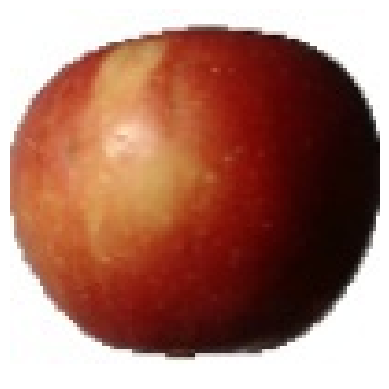

In [52]:
train_path=("../input/fruits/fruits-360_dataset/fruits-360/Training" )          
test_path=("../input/fruits/fruits-360_dataset/fruits-360/Test" )                           
img=load_img(train_path+"/Apple Braeburn/0_100.jpg")         
plt.imshow(img)
plt.axis("off")
plt.show()


<a id = '3'></a>
## Find Number of Classes and Image Size
We need to find image size and number of classes because will use for the model in the future.

In [53]:
x=img_to_array(img)
print(x.shape)
className=glob(train_path+'/*')    
numberOfClass=len(className)     
print(numberOfClass)

(100, 100, 3)
131


<a id = '4'></a>
## Create CNN Model
We will creat a cnn model but firs we need to understand of what is the cnn and why do we use cnn ?
<a id = '5'></a>
### What is the cnn ?
A convolutional neural network (CNN or ConvNet) is a network architecture for deep learning that learns directly from data.
CNNs are particularly useful for finding patterns in images to recognize objects, classes, and categories. They can also be quite effective for classifying audio, time-series, and signal data.
<a id = '6'></a>
### Why do we use cnn ?
CNNs provide an optimal architecture for uncovering and learning key features in image and time-series data.
<a id = '7'></a>
### How CNNs Work ?
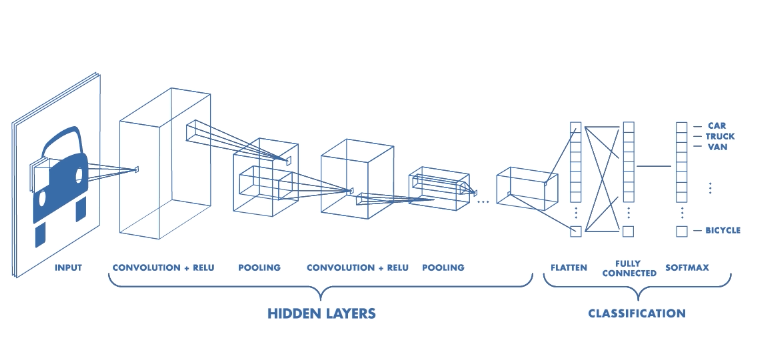

<a id = '8'></a>
#### Convolution Layer
First part of the cnn is convolution.The convolution layer is the core building block of the CNN. It carries the main portion of the network’s computational load.

This layer performs a dot product between two matrices, where one matrix is the set of learnable parameters otherwise known as a kernel, and the other matrix is the restricted portion of the receptive field. The kernel is spatially smaller than an image but is more in-depth. This means that, if the image is composed of three (RGB) channels, the kernel height and width will be spatially small, but the depth extends up to all three channels.
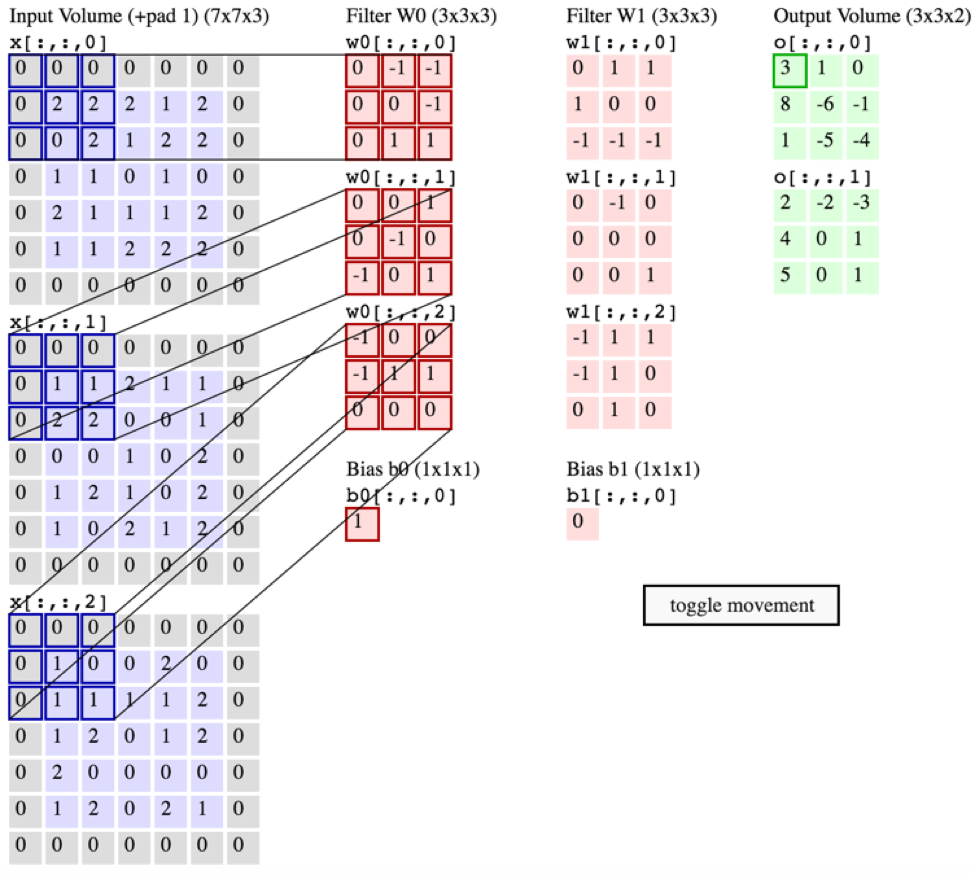

<a id = '9'></a>
#### Pooling Layer
The pooling layer replaces the output of the network at certain locations by deriving a summary statistic of the nearby outputs. This helps in reducing the spatial size of the representation, which decreases the required amount of computation and weights. The pooling operation is processed on every slice of the representation individually.

There are several pooling functions such as the average of the rectangular neighborhood, L2 norm of the rectangular neighborhood, and a weighted average based on the distance from the central pixel. However, the most popular process is max pooling, which reports the maximum output from the neighborhood.

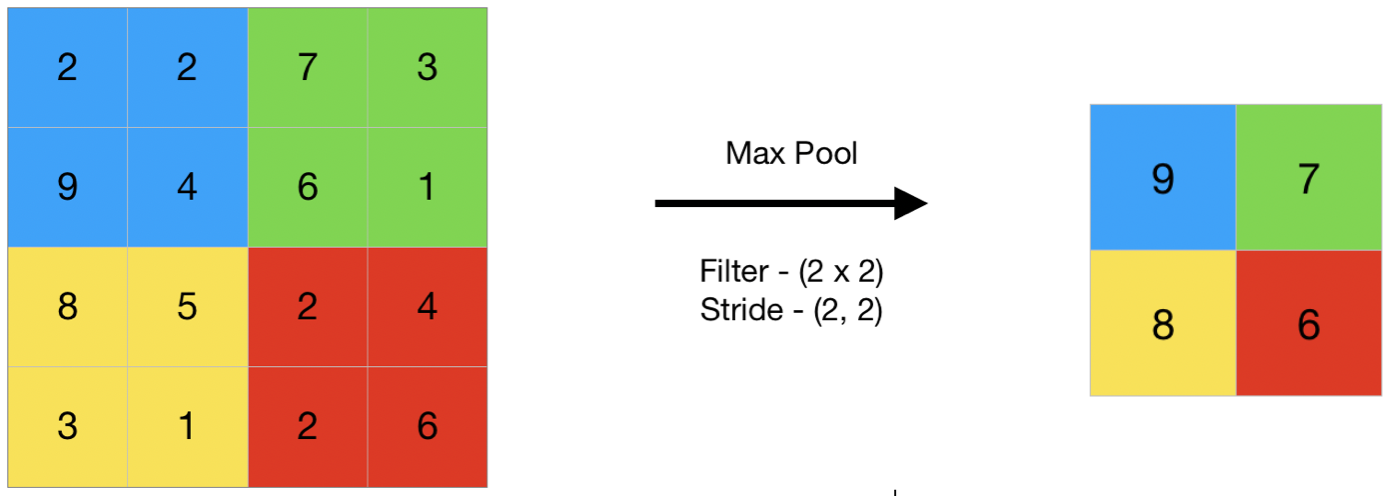

<a id = '10'></a>
#### Fully Connected Layer 
Neurons in this layer have full connectivity with all neurons in the preceding and succeeding layer as seen in regular FCNN. This is why it can be computed as usual by a matrix multiplication followed by a bias effect.

The FC layer helps to map the representation between the input and the output.

There is ann model in this layer.

<a id = '11'></a>
#### Relu Function  
The Rectified Linear Unit (ReLU) has become very popular in the last few years. It computes the function ƒ(κ)=max (0,κ). In other words, the activation is simply threshold at zero.

In comparison to sigmoid and tanh, ReLU is more reliable and accelerates the convergence by six times.

Unfortunately, a con is that ReLU can be fragile during training. A large gradient flowing through it can update it in such a way that the neuron will never get further updated. However, we can work with this by setting a proper learning rate.

<a id = '12'></a>
#### Softmax Function  
The softmax activation function transforms the raw outputs of the neural network into a vector of probabilities, essentially a probability distribution over the input classes. Consider a multiclass classification problem with N classes. The softmax activation returns an output vector that is N entries long, with the entry at index i corresponding to the probability of a particular input belonging to the class i.We will use softmax function for the cnn because we need to N outputs in fruit dataset. 

<a id = '13'></a>
#### Categorical Crossentropy
In a simple terms, if you remove all the jargons,

Categorical cross-entropy is a mathematical formula that is used in machine learning to help a computer learn how to classify things into different categories, like sorting pictures of animals into categories like "dog", "cat", or "bird".

The formula looks at how well the computer's guesses match the correct answers, and it tries to adjust the computer's guesses so that they become better over time.

The goal of the formula is to help the computer learn how to make better predictions by minimizing the difference between the computer's guesses and the correct answers. This formula is often used in deep learning models, which are a type of machine learning model that is based on neural networks.



In [54]:
model=Sequential() #Sequential is skleton for the cnn than we can add layers this skeleton.
model.add(Conv2D(32,(3,3),activation ='relu', input_shape = x.shape))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),activation ='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3),activation ='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
#Add to ann model.
model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass,activation="softmax"))

model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["accuracy"])
batch_size=32

<a id = '14'></a>
## Image Data Generator 
Let's imagine.You have some data but it's not enough to train models.What will you do? There is a function in keras for this problem.

ImageDataGenerator function performs functions such as zoom in zoom out rotate your data and now you have more data.

In [55]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                zoom_range=0.3,
                                horizontal_flip=True,
                                rotation_range=0.3)
test_datagen=ImageDataGenerator(rescale=1./255)

<a id = '15'></a>
## Flow From Directory
How do you add your images that in the file ? Keras library has a function for this.If you organize your images according to class keras can choose that images by class.We use flow_from_directory for this.

In [56]:
train_generator=train_datagen.flow_from_directory(train_path,
                                                 target_size=x.shape[:2],
                                                 batch_size=batch_size,
                                                 color_mode="rgb",
                                                 class_mode="categorical")
test_generator=test_datagen.flow_from_directory(test_path,
                                                 target_size=x.shape[:2],
                                                 batch_size=batch_size,
                                                 color_mode="rgb",
                                                 class_mode="categorical")

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


<a id = '16'></a>
## Fit the Model
While we are fitting the model we have to arrange some hyperparameter.These are epochs,steps_per_epoch and validation_steps.

steps_per_epoch:Number of iteration to be trained in each epoch.
validation_steps:Number of iteration to be tested in each epoch.

In [57]:
hist=model.fit(train_generator,
                   steps_per_epoch=3200//batch_size,
                   epochs=100,
                   validation_data=test_generator,
                   validation_steps=1600//batch_size)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 44s 409ms/step - accuracy: 0.0247 - loss: 4.7018 - val_accuracy: 0.1013 - val_loss: 3.5523
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 392ms/step - accuracy: 0.1338 - loss: 3.4042 - val_accuracy: 0.3631 - val_loss: 2.3412
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 376ms/step - accuracy: 0.2874 - loss: 2.5182 - val_accuracy: 0.6106 - val_loss: 1.4906
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 364ms/step - accuracy: 0.4676 - loss: 1.8148 - val_accuracy: 0.7256 - val_loss: 1.0311
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 323ms/step - accuracy: 0.5850 - loss: 1.3772 - val_accuracy: 0.7425 - val_loss: 0.8501
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 310ms/step - accuracy: 0.6464 - loss: 1.1422 - val_accuracy: 0.7481 - val_loss: 0.8597
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 318ms/step - accuracy: 0.7106 - loss: 0.9466 - val_accuracy: 0.8331 - val_loss: 0.5400
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 311ms/step - accuracy: 0.7452 -

<a id = '17'></a>
## Save Results
We need to save to results for use in the future.First,we save to weight values.

In [58]:
model.save_weights("Save_weights.weights.h5")

Than we save to accuracy and lose values.

In [59]:
import json
with open("Save_accu&lose.json","w") as s:
    json.dump(hist.history,s)



We write to values that saved in the past.

In [60]:
import codecs
with codecs.open("Save_accu&lose.json","r",encoding="utf-8") as s:
    h=json.loads(s.read())
    

<a id = '18'></a>
## Visualization of Results

In [62]:
print(h.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


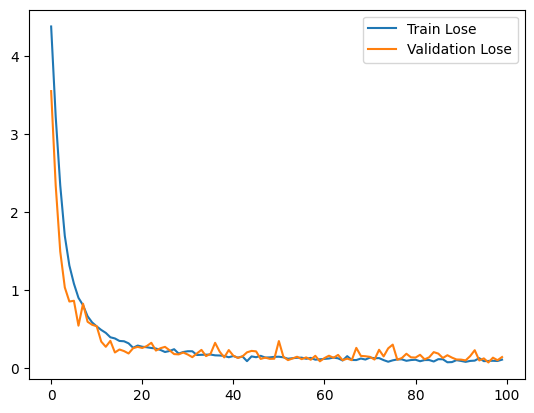

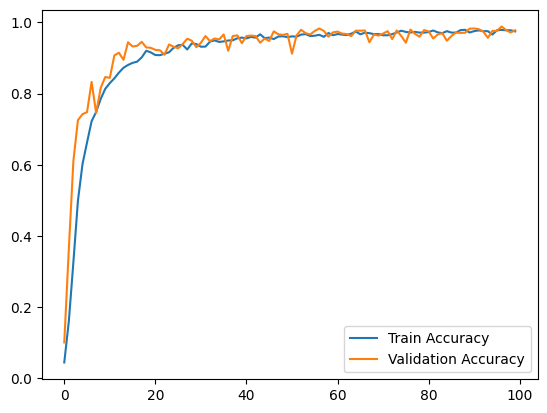

In [63]:
plt.plot(h["loss"],label="Train Lose")
plt.plot(h["val_loss"],label="Validation Lose")
plt.legend()
plt.show()
plt.figure()
plt.plot(h["accuracy"],label="Train Accuracy")
plt.plot(h["val_accuracy"],label="Validation Accuracy")
plt.legend()
plt.show()

<a id = '19'></a>
## Outcomes
CNN model is the most frequently used model today in training models for images. It is possible to obtain results above 99% accuracy with the correct hyperparameter values.